# Cosmology - Hubble function and cosmological distances

In this example we show how to initialize a cosmological model and to compute basic cosmological functions such as the Hubble function and cosmological distances.

## Loading NumCosmo

The first step is to load both NumCosmo and NumCosmoMath libraries. We also load some Python packages.

In [1]:
try:
  import gi
  gi.require_version('NumCosmo', '1.0')
  gi.require_version('NumCosmoMath', '1.0')
except:
  pass

from gi.repository import GObject
from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm

import sys
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Initializing the NumCosmo library:

In [2]:
__name__ = "NcContext"

Ncm.cfg_init ()
Ncm.cfg_set_log_handler (lambda msg: sys.stdout.write (msg) and sys.stdout.flush ())

### Initializing the objects

We first initialize the **NcHICosmo** object. It describes a cosmological model assuming a homogeneous and isotropic metric of the background. 

In particular, we initialize a **NcHICosmo** child whose Dark Energy (DE) component is described by a barotropic fluid with constant equation of state, **NcHICosmoDEXcdm**.

One choice we make here is to parametrize the problem considering the curvature density parameter, $\Omega_k$, instead of the DE density parameter $\Omega_{DE}$. 
We then set the values for the others cosmological parameters: 
1. The Hubble constant $H_0$;
2. The DE equation of state parameter $w$;
3. The baryon density parameter $\Omega_b$;
4. The cold dark matter density parameter $\Omega_c$;
5. The mass(es) of the neutrino(s) $m_{\nu}$;
6. The effective number of massless neutrinos $N_{\nu}$;
7. The temperature of the photons today $T_{\gamma 0}$.

The parameters that are not set here kepp the default values.

In [4]:
cosmo = Nc.HICosmo.new_from_name (Nc.HICosmo, "NcHICosmoDEXcdm{'massnu-length':<1>}")
cosmo.omega_x2omega_k ()
cosmo.param_set_by_name ("H0",        67.66)
cosmo.param_set_by_name ("Omegak",    0.0)
cosmo.param_set_by_name ("w",         -0.8)
cosmo.param_set_by_name ("Omegab",    0.049)
cosmo.param_set_by_name ("Omegac",    0.2621)
cosmo.param_set_by_name ("massnu_0",  0.0)
cosmo.param_set_by_name ("ENnu",      3.046)
cosmo.param_set_by_name ("Tgamma0",   2.7255)


### Computing the normalized Hubble function

$$E(z) = \frac{H(z)}{H_0} = \sqrt{\Omega_r (1+z)^4 + \Omega_m (1+z)^3 + \Omega_k (1+z)^2 + \Omega_{DE} (1+z)^3(1+w)},$$ where $z$ is the redshift, $H(z)$ is the Hubble function, $\Omega_r$ is the radiation density parameter, $\Omega_m = \Omega_c + \Omega_b$, and $\Omega_DE = 1 - \Omega_m - \Omega_r - \Omega_k$.

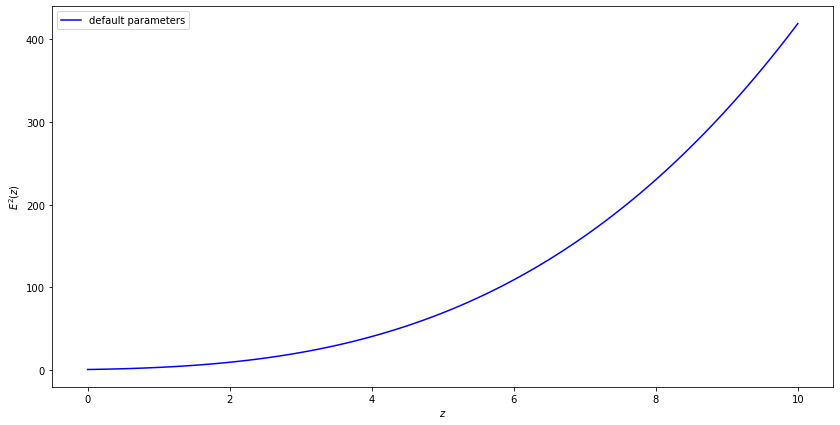

In [5]:
E2_list = []
z_list = np.linspace (0.0, 10.0, 100)
for z in z_list:
  E2 = cosmo.E2 (z)
  E2_list.append(E2)

plt.figure (figsize=(14, 7))

plt.plot (z_list, E2_list, 'b', label="default parameters")

plt.xlabel (r'$z$')
plt.ylabel (r'$E^2(z)$')
leg = plt.legend (loc = 'best')

### Initializing the distance object

At this step we initialize the NcDistance object. This object computes the cosmological distances using an interpolation method (spline) as a matter of optimization. 

The argument of the *new* function corresponds to the maximum redshift $z_{max}$ up to which the spline of the comoving distance will be prepared. The cosmological distances depend on the cosmological model. 

**Note that** if the user calls a distance function at a redshift $z^\prime$ bigger than $z_{max}$, then the computation between $z_{max}$ and $z^\prime$ is performed by numerical integration.

In [5]:
zmax = 10.0
dist = Nc.Distance.new (zmax)
dist.prepare (cosmo)



 ### Computing the comoving distance 
 
 $$d_c(z) = d_H \int_0^z \frac{dz^\prime}{E (z^\prime)},$$
 where the Hubble radius is $d_H = \frac{c}{H_0}$ and $c$ is the speed of light.
  

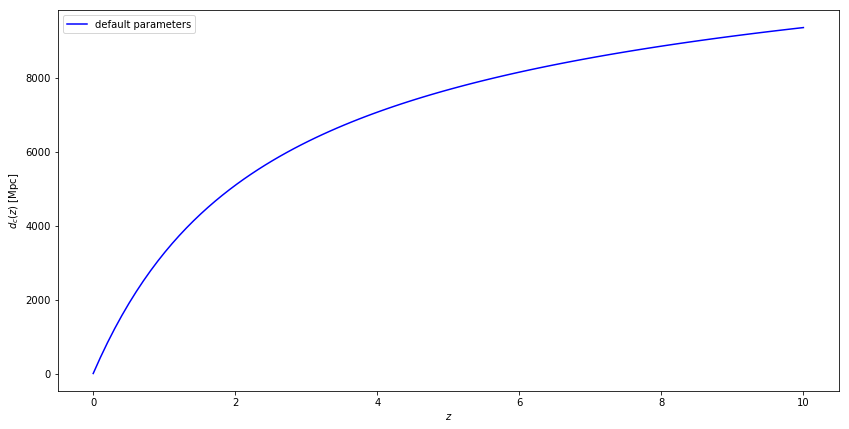

In [6]:
comoving_list = []
for z in z_list:
  comoving = dist.comoving (cosmo, z) * cosmo.RH_Mpc () 
  comoving_list.append(comoving)
    
    
plt.figure (figsize=(14, 7))

plt.plot (z_list, comoving_list, 'b', label="default parameters")

plt.xlabel (r'$z$')
plt.ylabel (r'$d_c(z)$ [Mpc]')
leg = plt.legend (loc = 'best')

#### We now compute other cosmological distances: 
1. Transverse comoving distance:

\begin{eqnarray}
d_M = \left\{
\begin{array}{c l}	
d_H \frac{1}{\sqrt{\Omega_K}} \sinh \left( \sqrt{\Omega_K} d_c/d_H  \right) & \text{for} \quad \Omega_K > 0 \\
d_c & \text{for} \quad \Omega_K = 0 \\
d_H \frac{1}{\sqrt{\vert \Omega_K \vert }} \sin \left( \sqrt{\vert \Omega_K \vert} d_c/d_H  \right) & \text{for} \quad \Omega_K < 0;
\end{array}\right.
\end{eqnarray}  

2. Luminosity distance:
$$d_L(z) = (1 + z) d_M(z);$$

3. Angular diameter distance:
$$d_A(z) = \frac{d_M(z)}{(1 + z)}.$$

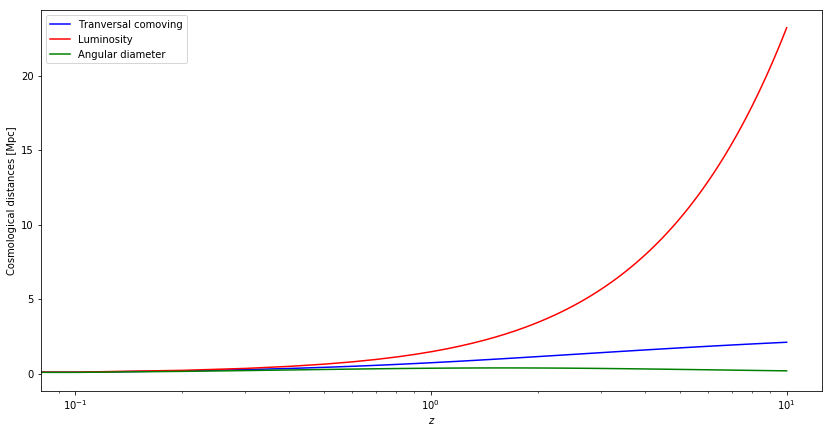

In [7]:
transv_list = []
lumin_list  = []
ang_list    = []

for z in z_list:
  transv = dist.transverse (cosmo, z)
  lumin  = dist.luminosity (cosmo, z)
  ang    = dist.angular_diameter (cosmo, z)  
  transv_list.append (transv)
  lumin_list.append (lumin)
  ang_list.append (ang)
    
plt.figure (figsize=(14, 7))

plt.xscale('log')
plt.plot (z_list, transv_list, 'b', label="Tranversal comoving")
plt.plot (z_list, lumin_list, 'r', label="Luminosity")
plt.plot (z_list, ang_list, 'g', label="Angular diameter")

plt.xlabel (r'$z$')
plt.ylabel (r'Cosmological distances [Mpc]')
leg = plt.legend (loc = 'best')    